# Question 3 codes and answers

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


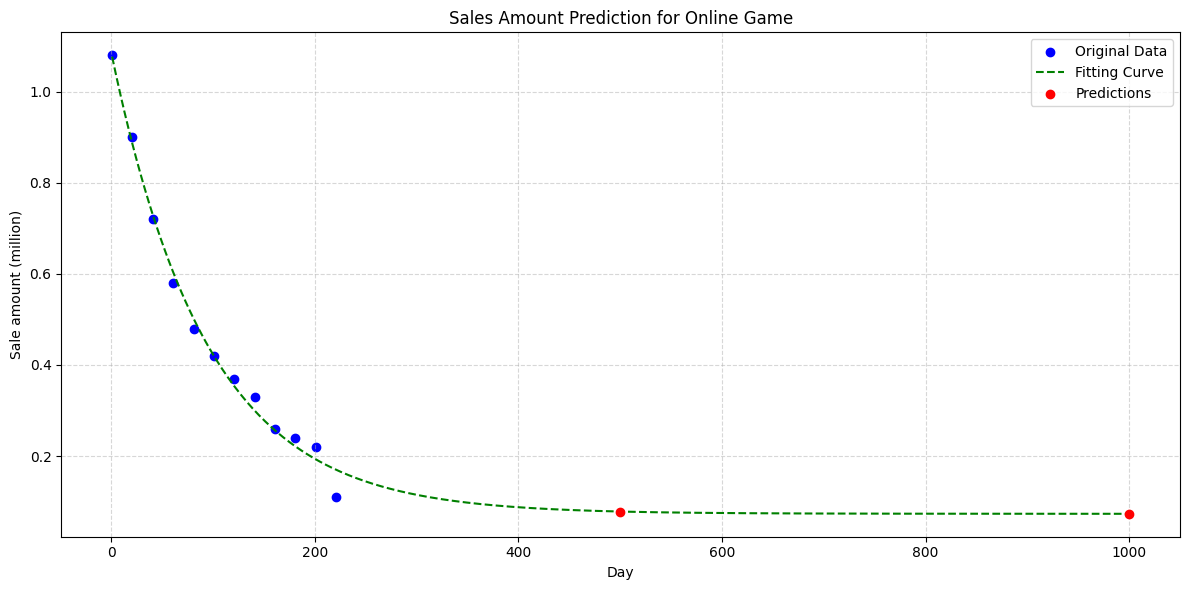

[0.07825852 0.07330358]


In [33]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the data
sales_data = pd.read_csv('sale_amount.csv')

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the function to the data
params, covariance = curve_fit(exp_decay, sales_data['Day'], sales_data['Sale amount (million)'])

# Make predictions
days_to_predict = np.array([500, 1000])
predictions = exp_decay(days_to_predict, *params)

# Clip negative predictions to zero
predictions = np.clip(predictions, 0, None)

# Enhancing the plot with a better design and fitting curve
plt.figure(figsize=(12, 6))
plt.scatter(sales_data['Day'], sales_data['Sale amount (million)'], color='blue', label='Original Data')

# Plot the fitting curve
days_line = np.linspace(min(sales_data['Day']), max(days_to_predict), 500)
plt.plot(days_line, exp_decay(days_line, *params), color='green', linestyle='--', label='Fitting Curve')

# Highlight predictions
plt.scatter(days_to_predict, predictions, color='red', zorder=5, label='Predictions')

# Adding titles and labels
plt.title('Sales Amount Prediction for Online Game')
plt.xlabel('Day')
plt.ylabel('Sale amount (million)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Output predictions
print(predictions)


# Online Game Sales Prediction Analysis

## Overview
The goal was to predict the sales amount for an online game on the 500th and 1000th days after launch. An exponential decay model was selected to forecast future sales based on historical data.

## Process

### Model Selection
An exponential decay function was chosen for the prediction model, mathematically represented as `a * exp(-b * x) + c`. The parameters of this model are:
- `a`: Initial sales amount.
- `b`: Decay rate.
- `c`: Horizontal asymptote, which represents the minimum sales amount as time approaches infinity.

### Parameter Estimation
`scipy.optimize.curve_fit` was used to optimize the parameters `a`, `b`, and `c` for the best fit to the historical data.

### Prediction
Predictions were made for the sales amount on the 500th and 1000th days using the optimized model parameters.

### Plotting
- Original data points were depicted as blue circles.
- The model's fitting curve was shown as a green dashed line.
- Predictions were highlighted with red squares.

## Results
- The predicted sales amount for the 500th day is approximately 0.0783 million.
- The predicted sales amount for the 1000th day is approximately 0.0733 million.

## Interpretation
The model suggests a continued decline in sales, asymptotically approaching a baseline level defined by parameter `c`. This implies that sales will decrease over time but may stabilize at a lower bound.

## Considerations
- The model assumes the future will mirror the past without accounting for external factors that might alter sales trends.
- Real-world events such as marketing campaigns, content updates, or competitive actions could significantly affect actual sales.

## Recommendations
- Continuously update the model with new data for more accurate predictions.
- Consider developing more complex forecasting models that account for external influences on game sales.

## Conclusion
The provided prediction offers a data-driven forecast based on historical sales trends. However, it should be considered a guide rather than an absolute projection, with real-world sales potentially differing due to numerous influencing factors.
